In [56]:
import pandas as pd

data = pd.read_csv('D:/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [58]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\ybrjulf\AppData\Local\Temp\ipykernel_4828\1930816743.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Outcome', ax=ax, palette=sns.color_palette("pastel"))
C:\Users\ybrjulf\AppData\Local\Temp\ipykernel_4828\1930816743.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=data, x='Outcome', ax=ax, palette=sns.color_palette("pastel"))


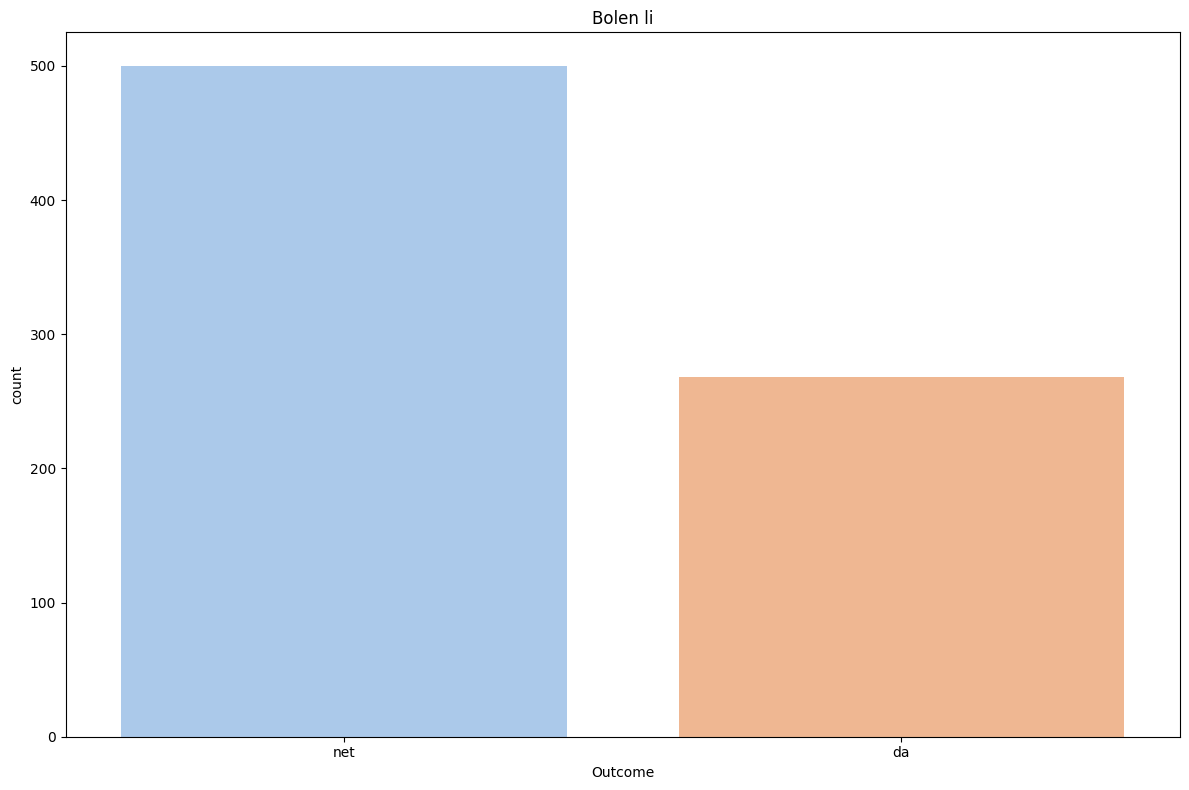

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Установка меток
labels = ["net", "da"]
ticks = range(len(labels))

# Сохдание фигуры
fig, ax = plt.subplots(figsize=(12, 8))

# Построение графика
sns.countplot(data=data, x='Outcome', ax=ax, hue='Outcome', palette=sns.color_palette("pastel"))
ax.set_title('Bolen li')
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()

Отделение зависиой и независимых параметров

In [60]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

Нормализация входа

In [61]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns=X.columns)

Разделение выборки на тестовую и обучающую части

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
X_train.shape

(537, 8)

In [64]:
X_test.shape

(231, 8)

In [65]:
y_train.shape

(537,)

Создание тензоров

In [66]:
import torch
import numpy as np

X_train = torch.from_numpy(X_train.values.astype(np.float32))
Y_train = torch.from_numpy(y_train.values.astype(np.float32))


X_test = torch.from_numpy(X_test.values.astype(np.float32))
Y_test = torch.from_numpy(y_test.values.astype(np.float32))

Разиваем датасет на пакеты.

In [67]:
from torch.utils.data import TensorDataset, DataLoader


train_ds = TensorDataset(X_train, Y_train)
test_ds = TensorDataset(X_train, Y_train)

BATCH_SIZE = 32
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

Создание экземпляра многослойного перцептрона.


In [72]:
from torch import nn

model = nn.Sequential(
    nn.Linear(8, 256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,1),
)
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=1, bias=True)
)


Определение функции потерь.

In [73]:
criterion = nn.BCEWithLogitsLoss()

Задание алгоритма оптимизации.

In [70]:
LEARNING_RATE =1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

Обучение модели.

In [ ]:
EPOCHS = 6666
losses = []

for epoch in range(EPOCHS):
    running_loss = 0
    for it, (x, y) in enumerate(train_dl):
        optimizer.zero_grad()
        outp = model(x)
        loss = criterion(outp, y_batch)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    else:
        print(f"Epoch {epoch} - Training loss: {running_loss/len(train_dl)}")
        losses.append(running_loss/len(train_dl))

Epoch 0 - Training loss: 0.6855711270781124
Epoch 1 - Training loss: 0.6855746682952432
Epoch 2 - Training loss: 0.6856884710928973
Epoch 3 - Training loss: 0.6855141485438627
Epoch 4 - Training loss: 0.6856568490757662
Epoch 5 - Training loss: 0.685716730706832
Epoch 6 - Training loss: 0.6856346516048207
Epoch 7 - Training loss: 0.6857431355644675
Epoch 8 - Training loss: 0.6857705431825974
Epoch 9 - Training loss: 0.6856315030771143
Epoch 10 - Training loss: 0.6856818479650161
Epoch 11 - Training loss: 0.6856546717531541
Epoch 12 - Training loss: 0.6856837342767155
Epoch 13 - Training loss: 0.6856492792858797
Epoch 14 - Training loss: 0.6856574100606582
Epoch 15 - Training loss: 0.6856286455603207
Epoch 16 - Training loss: 0.6857239323503831
Epoch 17 - Training loss: 0.6856551731334013
Epoch 18 - Training loss: 0.6856612598194796
Epoch 19 - Training loss: 0.6856966614723206
Epoch 20 - Training loss: 0.6855889032868778
Epoch 21 - Training loss: 0.685631678384893
Epoch 22 - Training lo

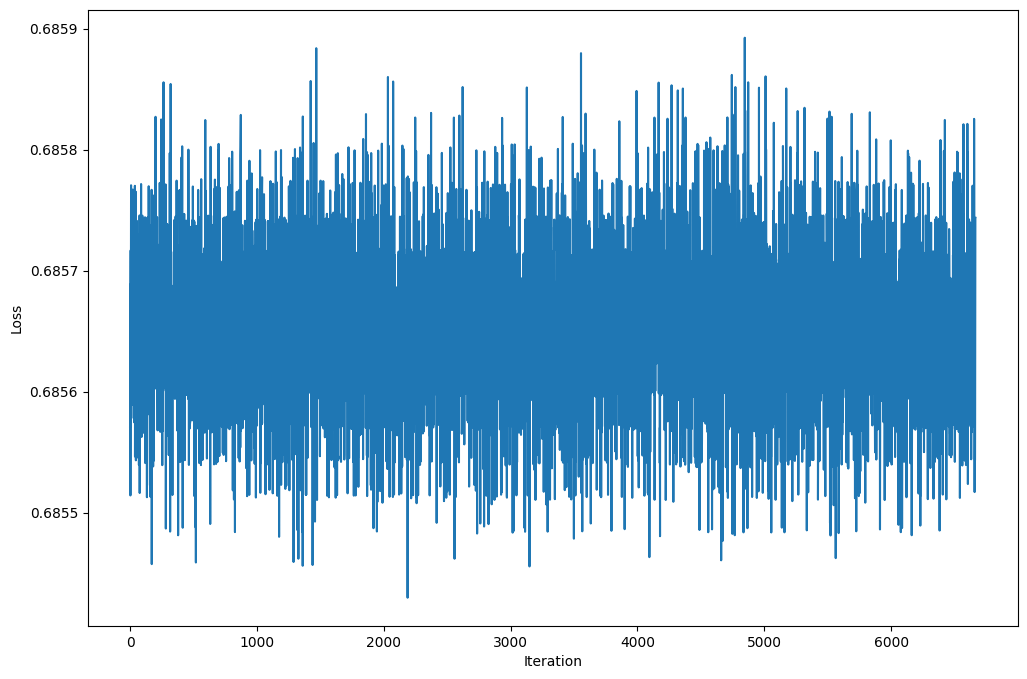

In [83]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(range(len(losses)), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

In [84]:
x,y

(tensor([[0.3529, 0.6231, 0.5902, 0.0000, 0.0000, 0.4113, 0.1238, 0.1333],
         [0.2353, 0.7236, 0.6721, 0.3232, 0.0000, 0.5738, 0.2032, 0.2667],
         [0.2941, 0.3920, 0.3934, 0.0000, 0.0000, 0.5022, 0.2459, 0.0667],
         [0.5294, 0.6181, 0.5738, 0.4444, 0.1111, 0.4933, 0.1264, 0.3167],
         [0.4118, 0.8090, 0.7049, 0.0000, 0.0000, 0.4531, 0.0371, 0.4333],
         [0.4706, 0.7588, 0.6393, 0.3232, 0.2482, 0.6393, 0.1870, 0.2500],
         [0.3529, 0.5578, 0.5246, 0.3939, 0.0000, 0.5097, 0.0777, 0.0500],
         [0.6471, 0.6030, 0.6557, 0.3737, 0.1773, 0.6304, 0.3019, 0.4500],
         [0.0588, 0.5377, 0.5902, 0.3030, 0.0969, 0.4590, 0.3173, 0.0500],
         [0.1176, 0.7789, 0.6066, 0.1717, 0.1135, 0.3964, 0.1516, 0.1000],
         [0.0000, 0.6884, 0.3279, 0.3535, 0.1986, 0.6423, 0.9436, 0.2000],
         [0.4118, 0.5729, 0.5410, 0.0000, 0.0000, 0.4888, 0.0769, 0.3500],
         [0.5294, 0.8241, 0.6393, 0.0000, 0.0000, 0.4888, 0.0299, 0.4000],
         [0.4706, 0.5930,

In [85]:
it = iter(test_ds)

In [86]:
x, y = next(it)

In [87]:
with torch.no_grad():
  y_pred = model(x)

Прогнозное значение

In [88]:
y_pred

tensor([-0.0548])

Подсчёт ошибки

In [89]:
abs(y - y_pred)

tensor([0.0548])

Оценим среднюю ошибку прогноза по всей тестовой выборке.

In [90]:
with torch.no_grad():
  outp = model(X_test)
Y_pred = torch.reshape(outp, (-1,))
print(torch.mean(torch.abs(Y_pred - Y_test)))

tensor(0.4015)
